In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_csv('./clean_data/inner_merge_data.csv')
data.head()

county_state          county state     fips  svi_ctgy  metro_status  \
0          mason_mi    Mason County    MI  26105.0       2.0           0.0   
1         colusa_ca   Colusa County    CA   6011.0       3.0           0.0   
2          henry_al    Henry County    AL   1067.0       3.0           1.0   
3        pulaski_ky  Pulaski County    KY  21199.0       3.0           0.0   
4  franklin city_va   Franklin city    VA  51620.0       3.0           0.0   

   census2019  census_pct_65plus  census_pct_18to64  dose1_pct_030121  ...  \
0     29144.0          24.255421          55.486550              19.9  ...   
1     21547.0          14.916230          57.975588              12.4  ...   
2     17205.0          23.429236          56.181343              13.8  ...   
3     64979.0          18.975361          58.734360              12.7  ...   
4      7967.0          19.066148          54.951676               0.0  ...   

   housing_wgt  overall_wgt  pct_hesitant_02-24-22  \
0     0.514260     0.489260                  0.187   
1     0.738581     0.809511                  0.293   
2     0.423016     0.583247                  0.339   
3     0.547083     0.638048                  0.297   
4     0.366614     0.626408                  0.180   

   pct_somewhat_hesitant_02-24-22  pct_highly_hesitant_02-24-22  \
0                           0.046                         0.141   
1                           0.081                         0.212   
2                           0.075                         0.264   
3                           0.064                         0.233   
4                           0.059                         0.121   

   candidate_won  winner_votes  total_votes  pct_trump  pct_biden  
0            1.0       10207.0      17254.0      0.592      0.408  
1            1.0        4554.0       7951.0      0.573      0.427  
2            1.0        6607.0       9298.0      0.711      0.289  
3            1.0       25442.0      31557.0      0.806      0.194  
4            0.0        2525.0       4058.0      0.378      0.622  

[5 rows x 33 columns]

In [3]:
data['dose1_pct_030122'].value_counts()

0.0     86
95.0    57
56.0    17
50.7    17
55.9    15
        ..
92.2     1
89.9     1
22.0     1
25.3     1
87.5     1
Name: dose1_pct_030122, Length: 590, dtype: int64

In [4]:
data[data['series_complete_pct_090121']>0]

county_state            county state     fips  svi_ctgy  \
0               mason_mi      Mason County    MI  26105.0       2.0   
1              colusa_ca     Colusa County    CA   6011.0       3.0   
2               henry_al      Henry County    AL   1067.0       3.0   
3             pulaski_ky    Pulaski County    KY  21199.0       3.0   
5               aiken_sc      Aiken County    SC  45003.0       3.0   
...                  ...               ...   ...      ...       ...   
3136        brunswick_nc  Brunswick County    NC  37019.0       2.0   
3138             pike_il       Pike County    IL  17149.0       2.0   
3139           warren_il     Warren County    IL  17187.0       3.0   
3140             cass_mo       Cass County    MO  29037.0       1.0   
3141  richland parish_la   Richland Parish    LA  22083.0       4.0   

      metro_status  census2019  census_pct_65plus  census_pct_18to64  \
0              0.0     29144.0          24.255421          55.486550   
1              0.0     21547.0          14.916230          57.975588   
2              1.0     17205.0          23.429236          56.181343   
3              0.0     64979.0          18.975361          58.734360   
5              1.0    170872.0          19.893253          58.722904   
...            ...         ...                ...                ...   
3136           1.0    142820.0          32.631984          52.646688   
3138           0.0     15561.0          21.283979          56.185335   
3139           0.0     16844.0          20.173355          58.311565   
3140           1.0    105780.0          17.332199          58.842881   
3141           0.0     20122.0          18.109532          58.716827   

      dose1_pct_030121  ...  housing_wgt  overall_wgt  pct_hesitant_02-24-22  \
0                 19.9  ...     0.514260     0.489260                  0.187   
1                 12.4  ...     0.738581     0.809511                  0.293   
2                 13.8  ...     0.423016     0.583247                  0.339   
3                 12.7  ...     0.547083     0.638048                  0.297   
5                 12.9  ...     0.508265     0.562289                  0.219   
...                ...  ...          ...          ...                    ...   
3136              23.1  ...     0.453389     0.451004                  0.193   
3138              19.9  ...     0.494221     0.507304                  0.311   
3139              19.0  ...     0.626059     0.564471                  0.250   
3140              12.0  ...     0.367826     0.336597                  0.194   
3141              15.7  ...     0.707706     0.705161                  0.295   

      pct_somewhat_hesitant_02-24-22  pct_highly_hesitant_02-24-22  \
0                              0.046                         0.141   
1                              0.081                         0.212   
2                              0.075                         0.264   
3                              0.064                         0.233   
5                              0.054                         0.166   
...                              ...                           ...   
3136                           0.054                         0.139   
3138                           0.090                         0.220   
3139                           0.058                         0.192   
3140                           0.057                         0.137   
3141                           0.090                         0.205   

      candidate_won  winner_votes  total_votes  pct_trump  pct_biden  
0               1.0       10207.0      17254.0      0.592      0.408  
1               1.0        4554.0       7951.0      0.573      0.427  
2               1.0        6607.0       9298.0      0.711      0.289  
3               1.0       25442.0      31557.0      0.806      0.194  
5               1.0       51589.0      85185.0      0.606      0.394  
...             ...           ...          ...        ...        .

In [5]:
df = data[data['dose1_pct_030122'] > 0].copy()

In [6]:
df.dtypes

county_state                       object
county                             object
state                              object
fips                              float64
svi_ctgy                          float64
metro_status                      float64
census2019                        float64
census_pct_65plus                 float64
census_pct_18to64                 float64
dose1_pct_030121                  float64
series_complete_pct_030121        float64
booster_doses_pct_030121          float64
dose1_pct_090121                  float64
series_complete_pct_090121        float64
booster_doses_pct_090121          float64
dose1_pct_030122                  float64
series_complete_pct_030122        float64
booster_doses_pct_030122          float64
null_pct                          float64
uninsured_pct                     float64
socio_wgt                         float64
hh_wgt                            float64
minority_wgt                      float64
housing_wgt                       

In [7]:
df.set_index('county_state',inplace=True)

In [8]:
df.isnull().sum()

county                            0
state                             0
fips                              0
svi_ctgy                          1
metro_status                      1
census2019                        0
census_pct_65plus                 0
census_pct_18to64                 0
dose1_pct_030121                  0
series_complete_pct_030121        0
booster_doses_pct_030121          0
dose1_pct_090121                  0
series_complete_pct_090121        0
booster_doses_pct_090121          0
dose1_pct_030122                  0
series_complete_pct_030122        0
booster_doses_pct_030122          0
null_pct                          0
uninsured_pct                     0
socio_wgt                         0
hh_wgt                            0
minority_wgt                      0
housing_wgt                       0
overall_wgt                       0
pct_hesitant_02-24-22             1
pct_somewhat_hesitant_02-24-22    1
pct_highly_hesitant_02-24-22      1
candidate_won               

### Imputing Missing Values

In [9]:
df.groupby('state').mean()[['svi_ctgy']]

svi_ctgy
state          
AK     2.724138
AL     3.268657
AR     3.386667
AZ     3.733333
CA     3.060000
CO     2.140625
CT     1.875000
DC     3.000000
DE     2.333333
FL     3.089552
GA     3.295597
IA     1.474747
ID     2.295455
IL     1.980392
IN     1.956522
KS     1.790476
KY     3.025000
LA     3.625000
MA     2.000000
MD     2.041667
ME     1.750000
MI     2.195122
MN     1.620690
MO     2.504348
MS     3.621951
MT     1.732143
NC     3.100000
ND     1.301887
NE     1.514286
NH     1.200000
NJ     2.190476
NM     3.468750
NV     2.764706
NY     2.354839
OH     2.090909
OK     3.142857
OR     2.888889
PA     1.970149
RI     1.600000
SC     3.413043
SD     1.787879
TN     2.842105
TX     3.142857
UT     1.862069
VA     2.201613
VT     1.357143
WA     2.589744
WI     1.527778
WV     2.563636
WY     1.608696

In [10]:
df[df['svi_ctgy'].isnull()]

county state     fips  svi_ctgy  metro_status  \
county_state                                                              
rio arriba_nm  Rio Arriba County    NM  35039.0       NaN           0.0   

               census2019  census_pct_65plus  census_pct_18to64  \
county_state                                                      
rio arriba_nm     38921.0          20.076565          56.858765   

               dose1_pct_030121  series_complete_pct_030121  ...  housing_wgt  \
county_state                                                 ...                
rio arriba_nm              11.5                         7.1  ...     0.716337   

               overall_wgt  pct_hesitant_02-24-22  \
county_state                                        
rio arriba_nm     0.781358                   0.14   

               pct_somewhat_hesitant_02-24-22  pct_highly_hesitant_02-24-22  \
county_state                                                                  
rio arriba_nm                           0.065                         0.076   

               candidate_won  winner_votes  total_votes  pct_trump  pct_biden  
county_state                                                                   
rio arriba_nm            0.0       10990.0      16628.0      0.339      0.661  

[1 rows x 32 columns]

In [11]:
#Imputing mean for svi_ctgy
df.loc['rio arriba_nm','svi_ctgy'] = 3

In [12]:
#df.loc['chugach census area_ak','svi_ctgy'] = 3

In [13]:
#df.loc['copper river census area_ak','svi_ctgy'] = 3

In [14]:
#df.loc['chugach census area_ak','county'] = 'Chugach Census Area'

In [15]:
#df.loc['copper river census area_ak','county'] = 'Copper River Census Area'

In [16]:
#df.loc['chugach census area_ak','state'] = 'AK'

In [17]:
#df.loc['copper river census area_ak','state'] = 'AK'

In [18]:
#df.isnull().sum()

In [19]:
df['fips'].describe()

count     3056.000000
mean     30391.368455
std      15259.416009
min       1001.000000
25%      18160.500000
50%      29124.000000
75%      46011.500000
max      56045.000000
Name: fips, dtype: float64

In [20]:
df[df['metro_status'].isnull()]

county state    fips  svi_ctgy  \
county_state                                                            
valdez-cordova_ak  Valdez-Cordova Census Area    AK  2261.0       2.0   

                   metro_status  census2019  census_pct_65plus  \
county_state                                                     
valdez-cordova_ak           NaN      9202.0          14.431645   

                   census_pct_18to64  dose1_pct_030121  \
county_state                                             
valdez-cordova_ak          62.225603              23.4   

                   series_complete_pct_030121  ...  housing_wgt  overall_wgt  \
county_state                                   ...                             
valdez-cordova_ak                        16.5  ...     0.870421     0.482602   

                   pct_hesitant_02-24-22  pct_somewhat_hesitant_02-24-22  \
county_state                                                               
valdez-cordova_ak                    NaN                             NaN   

                   pct_highly_hesitant_02-24-22  candidate_won  winner_votes  \
county_state                                                                   
valdez-cordova_ak                           NaN            1.0      189951.0   

                   total_votes  pct_trump  pct_biden  
county_state                                          
valdez-cordova_ak     359530.0      0.528      0.428  

[1 rows x 32 columns]

In [21]:
#Subject matter knowledge
#Non-metro
df.loc['valdez-cordova_ak','metro_status'] = 0

In [22]:
#df.loc['chugach census area_ak','metro_status'] = 0

In [23]:
#df.loc['copper river census area_ak','metro_status'] = 0

In [24]:
#df.dropna(inplace=True)

In [25]:
df.drop(columns=['booster_doses_pct_030121','booster_doses_pct_090121'], inplace=True)

In [26]:
df.dropna(inplace=True)

## Features

In [28]:
df.columns

Index(['county', 'state', 'fips', 'svi_ctgy', 'metro_status', 'census2019',
       'census_pct_65plus', 'census_pct_18to64', 'dose1_pct_030121',
       'series_complete_pct_030121', 'dose1_pct_090121',
       'series_complete_pct_090121', 'dose1_pct_030122',
       'series_complete_pct_030122', 'booster_doses_pct_030122', 'null_pct',
       'uninsured_pct', 'socio_wgt', 'hh_wgt', 'minority_wgt', 'housing_wgt',
       'overall_wgt', 'pct_hesitant_02-24-22',
       'pct_somewhat_hesitant_02-24-22', 'pct_highly_hesitant_02-24-22',
       'candidate_won', 'winner_votes', 'total_votes', 'pct_trump',
       'pct_biden'],
      dtype='object')

In [29]:
X = df.drop(columns=['county','state','fips','census2019','dose1_pct_030121','series_complete_pct_030121','dose1_pct_090121',
                      'series_complete_pct_090121','dose1_pct_030122','null_pct','candidate_won', 'winner_votes','total_votes','pct_trump','pct_biden'])
X.head()

svi_ctgy  metro_status  census_pct_65plus  census_pct_18to64  \
county_state                                                                 
mason_mi           2.0           0.0          24.255421          55.486550   
colusa_ca          3.0           0.0          14.916230          57.975588   
henry_al           3.0           1.0          23.429236          56.181343   
pulaski_ky         3.0           0.0          18.975361          58.734360   
aiken_sc           3.0           1.0          19.893253          58.722904   

              series_complete_pct_030122  booster_doses_pct_030122  \
county_state                                                         
mason_mi                            60.1                      58.2   
colusa_ca                           59.7                      33.6   
henry_al                            44.9                      33.8   
pulaski_ky                          45.6                      40.9   
aiken_sc                            45.2                      36.2   

              uninsured_pct  socio_wgt    hh_wgt  minority_wgt  housing_wgt  \
county_state                                                                  
mason_mi           0.067373   0.519038  0.721260      0.163782     0.514260   
colusa_ca          0.102637   0.654030  0.687567      0.875846     0.738581   
henry_al           0.111948   0.687634  0.754715      0.288568     0.423016   
pulaski_ky         0.058103   0.785212  0.806002      0.118135     0.547083   
aiken_sc           0.111582   0.590912  0.602271      0.449063     0.508265   

              overall_wgt  pct_hesitant_02-24-22  \
county_state                                       
mason_mi         0.489260                  0.187   
colusa_ca        0.809511                  0.293   
henry_al         0.583247                  0.339   
pulaski_ky       0.638048                  0.297   
aiken_sc         0.562289                  0.219   

              pct_somewhat_hesitant_02-24-22  pct_highly_hesitant_02-24-22  
county_state                                                                
mason_mi                               0.046                         0.141  
colusa_ca                              0.081                         0.212  
henry_al                               0.075                         0.264  
pulaski_ky                             0.064                         0.233  
aiken_sc                               0.054                         0.166

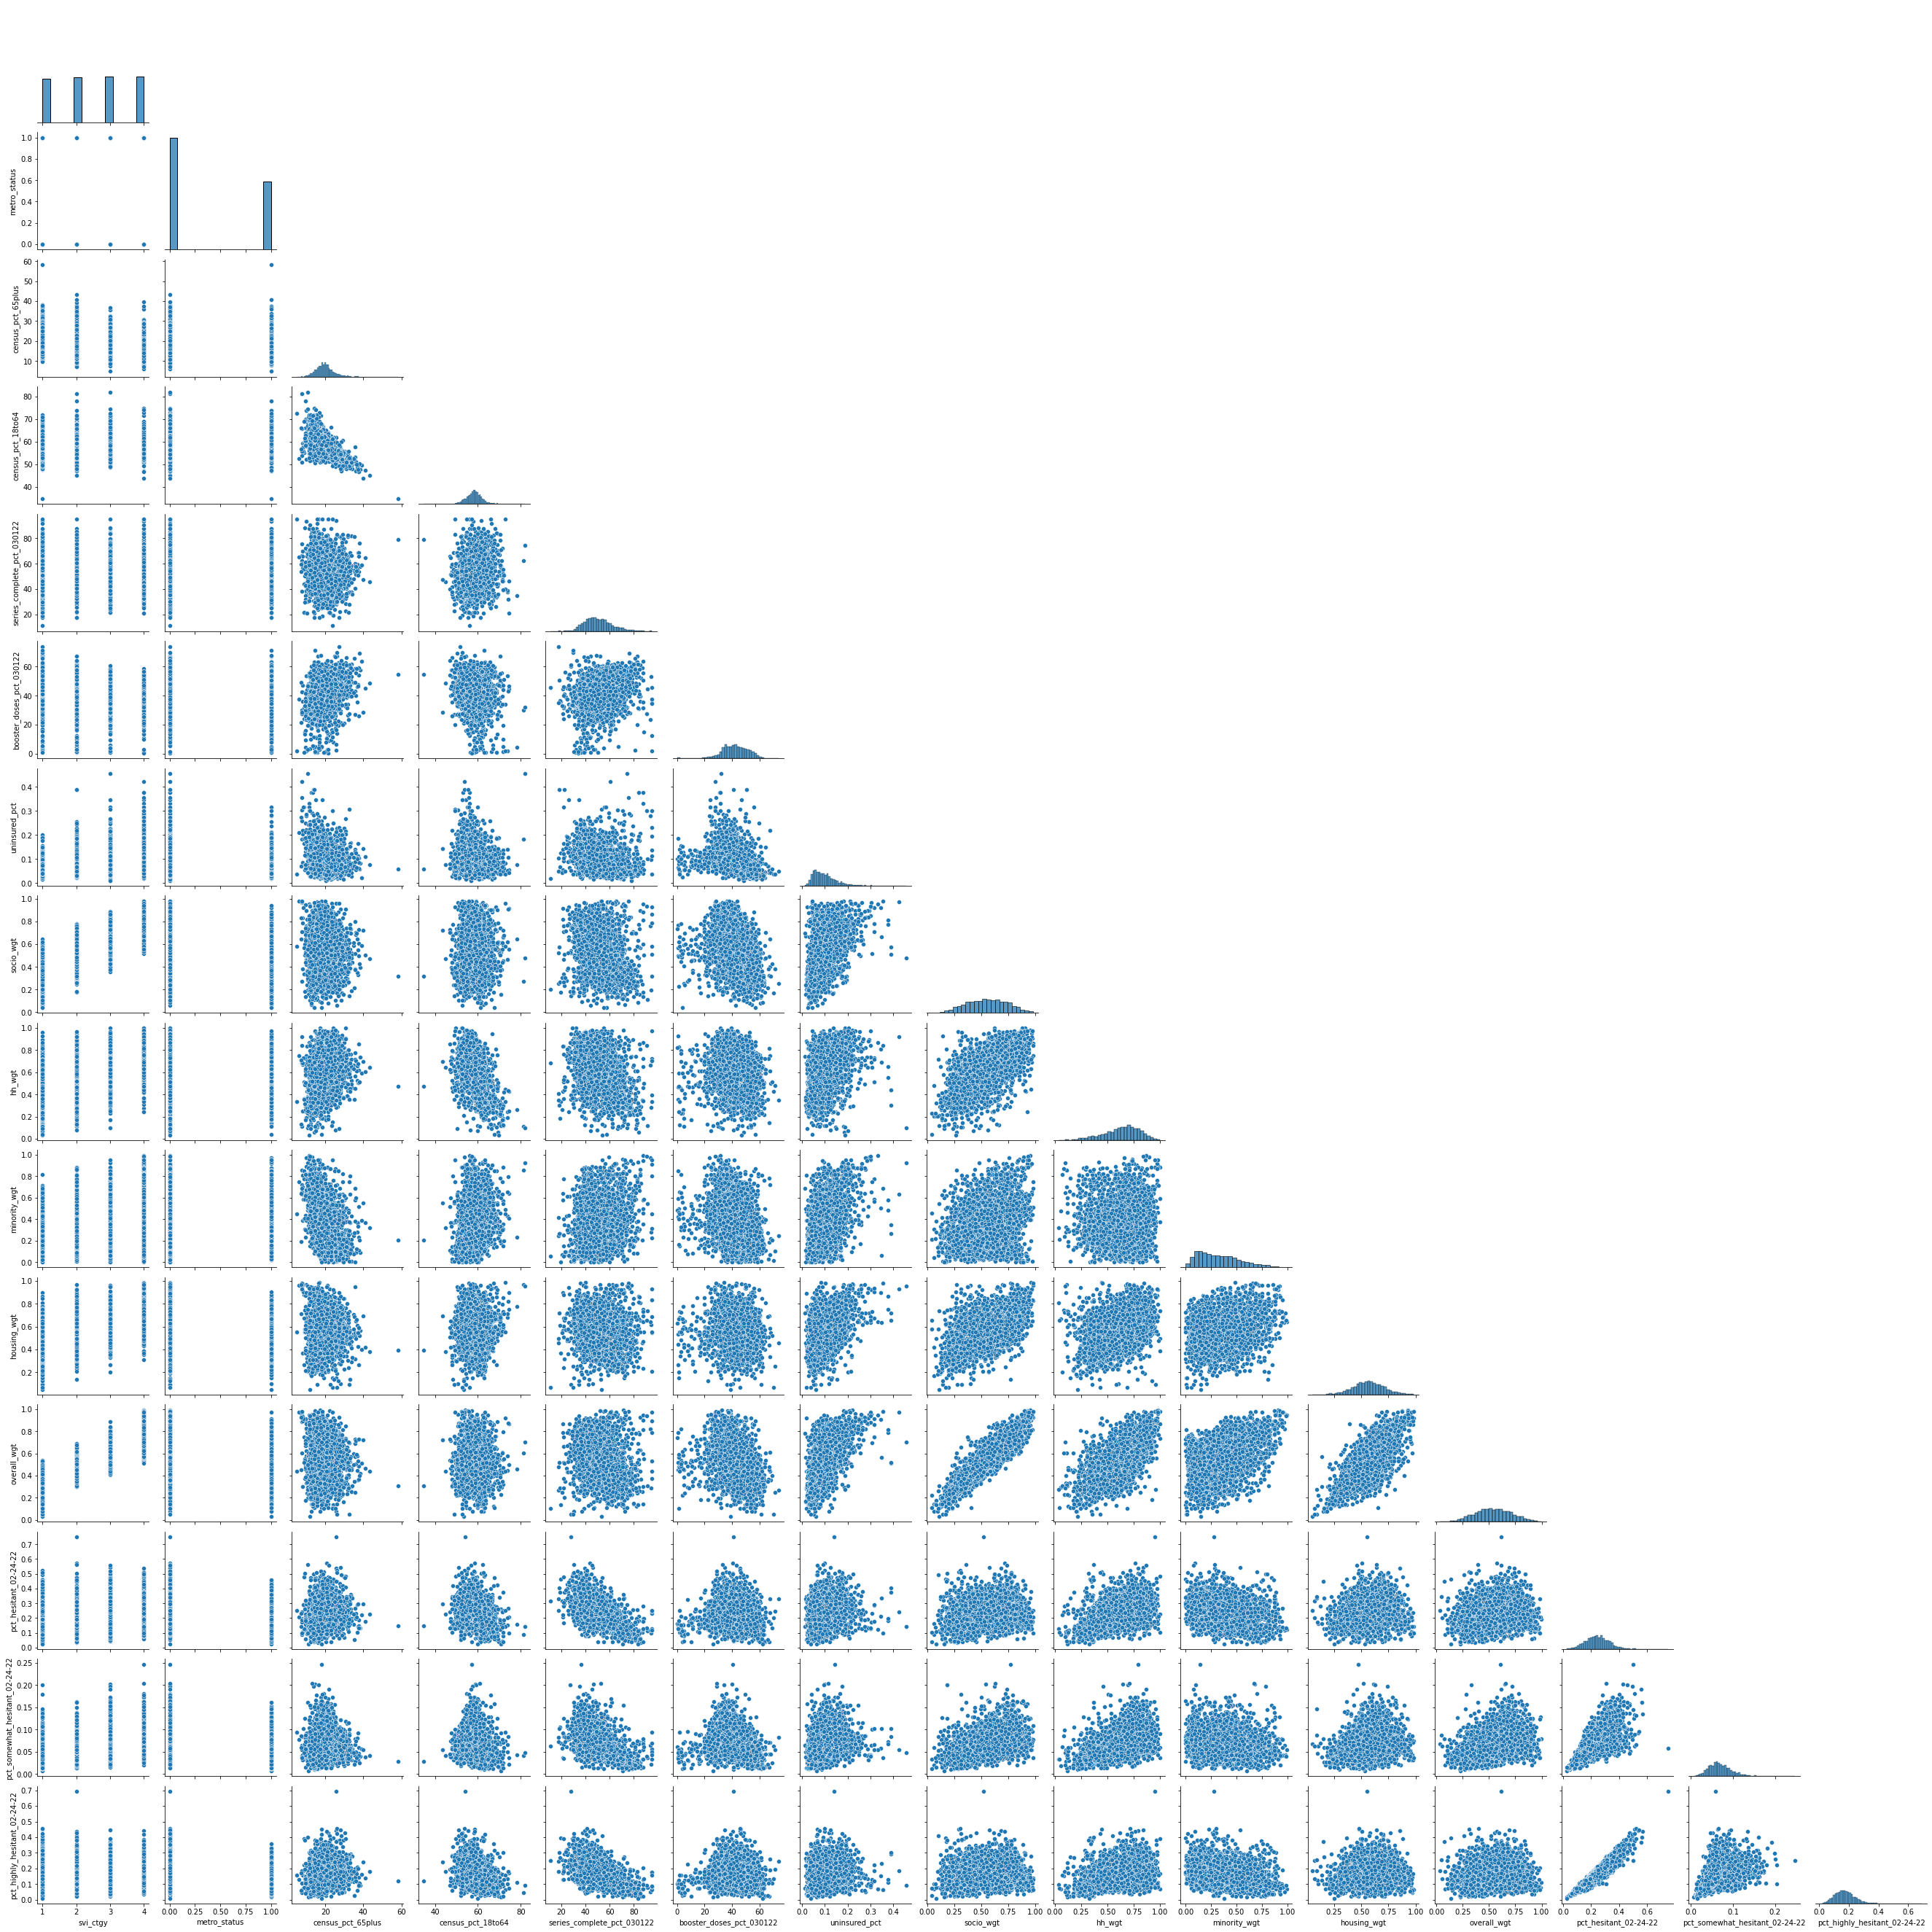

In [30]:
sns.pairplot(X, corner=True)

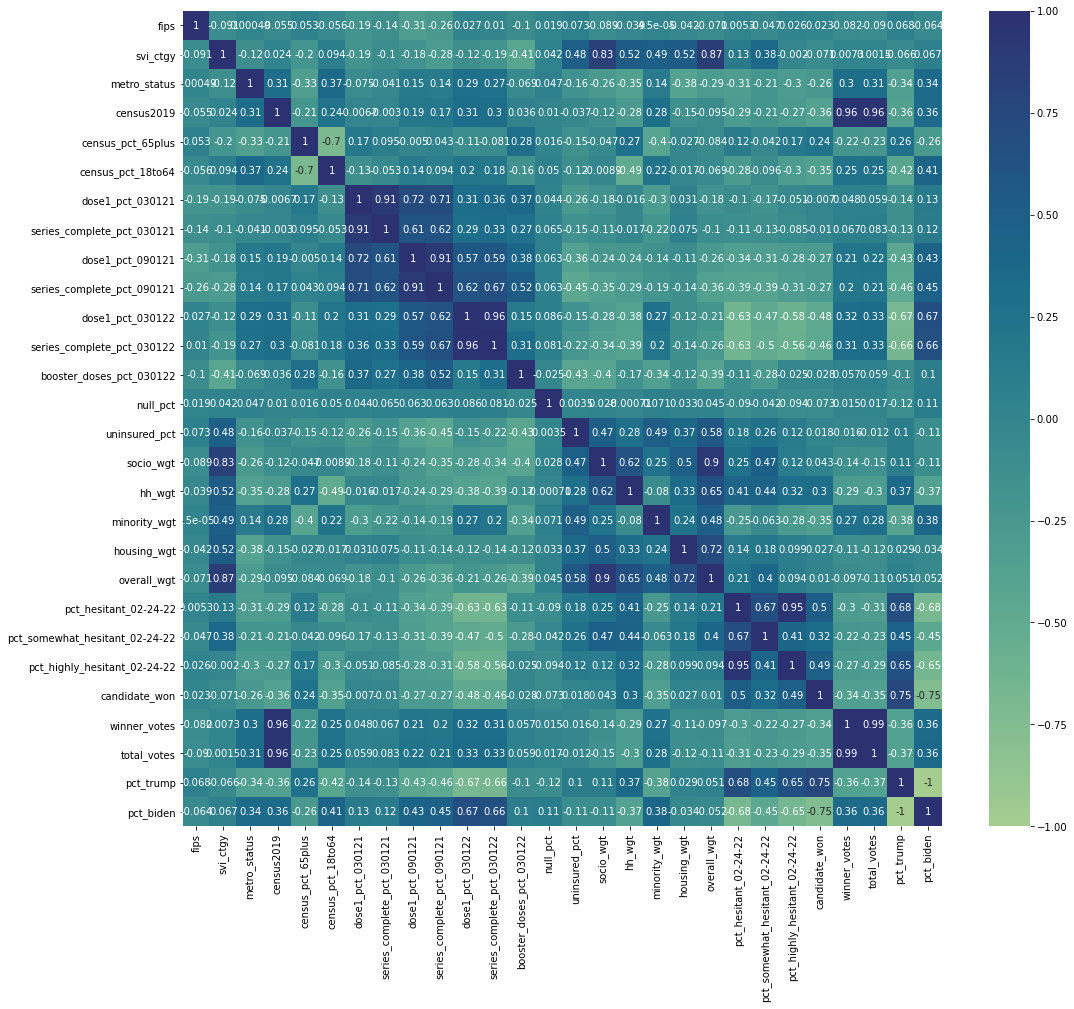

In [31]:
plt.figure(figsize=(17,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='crest');

## Standard Scaler

In [32]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

## PCA

In [33]:
len(X.columns)

15

In [57]:
pca = PCA(n_components=15)
X_pca = pca.fit_transform(X_scaled)

In [60]:
#PCA Components
pca_components = pd.DataFrame(X_pca)

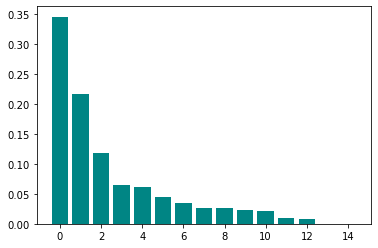

In [61]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='#008584');

Text(0, 0.5, 'PCA 2')

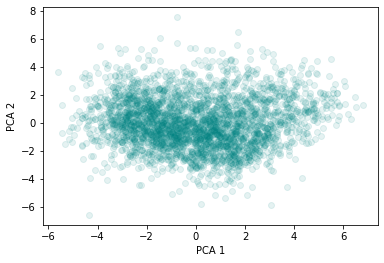

In [62]:
plt.scatter(pca_components[0], pca_components[1], alpha=.1, color='#008584')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

### Inertia

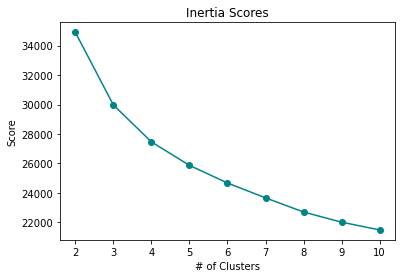

In [38]:
inertia_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)
    
plt.plot(range(2, 11), inertia_list, marker='o', color = '#008584' )
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Inertia Scores');

### Silhouette Score

In [39]:
silhouette_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_list.append(silhouette_score(X_scaled, kmeans.labels_))

silhouette_list
# plt.plot(range(2, 11), silhouette_list, marker='o')
# plt.xlabel('# of Clusters')
# plt.ylabel('Score')
# plt.title('Silhouette Scores');

[0.21437914338045425,
 0.1884140351509344,
 0.1599697258312027,
 0.15422926030370498,
 0.13926377757123254,
 0.12483085849470568,
 0.1270877686337159,
 0.12057090266309782,
 0.11814398211436329]

## Model

In [40]:
km = KMeans(n_clusters =3, random_state=42)
km.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

## Cluster Predictions 


In [41]:
km.predict(X_scaled)

array([1, 0, 0, ..., 1, 2, 0], dtype=int32)

In [42]:
df['cluster'] = km.labels_
df.head()

county state     fips  svi_ctgy  metro_status  \
county_state                                                          
mason_mi        Mason County    MI  26105.0       2.0           0.0   
colusa_ca      Colusa County    CA   6011.0       3.0           0.0   
henry_al        Henry County    AL   1067.0       3.0           1.0   
pulaski_ky    Pulaski County    KY  21199.0       3.0           0.0   
aiken_sc        Aiken County    SC  45003.0       3.0           1.0   

              census2019  census_pct_65plus  census_pct_18to64  \
county_state                                                     
mason_mi         29144.0          24.255421          55.486550   
colusa_ca        21547.0          14.916230          57.975588   
henry_al         17205.0          23.429236          56.181343   
pulaski_ky       64979.0          18.975361          58.734360   
aiken_sc        170872.0          19.893253          58.722904   

              dose1_pct_030121  series_complete_pct_030121  ...  overall_wgt  \
county_state                                                ...                
mason_mi                  19.9                        12.1  ...     0.489260   
colusa_ca                 12.4                         3.8  ...     0.809511   
henry_al                  13.8                         6.1  ...     0.583247   
pulaski_ky                12.7                         6.1  ...     0.638048   
aiken_sc                  12.9                         6.1  ...     0.562289   

              pct_hesitant_02-24-22  pct_somewhat_hesitant_02-24-22  \
county_state                                                          
mason_mi                      0.187                           0.046   
colusa_ca                     0.293                           0.081   
henry_al                      0.339                           0.075   
pulaski_ky                    0.297                           0.064   
aiken_sc                      0.219                           0.054   

              pct_highly_hesitant_02-24-22  candidate_won  winner_votes  \
county_state                                                              
mason_mi                             0.141            1.0       10207.0   
colusa_ca                            0.212            1.0        4554.0   
henry_al                             0.264            1.0        6607.0   
pulaski_ky                           0.233            1.0       25442.0   
aiken_sc                             0.166            1.0       51589.0   

              total_votes  pct_trump  pct_biden  cluster  
county_state                                              
mason_mi          17254.0      0.592      0.408        1  
colusa_ca          7951.0      0.573      0.427        0  
henry_al           9298.0      0.711      0.289        0  
pulaski_ky        31557.0      0.806      0.194        0  
aiken_sc          85185.0      0.606      0.394        0  

[5 rows x 31 columns]

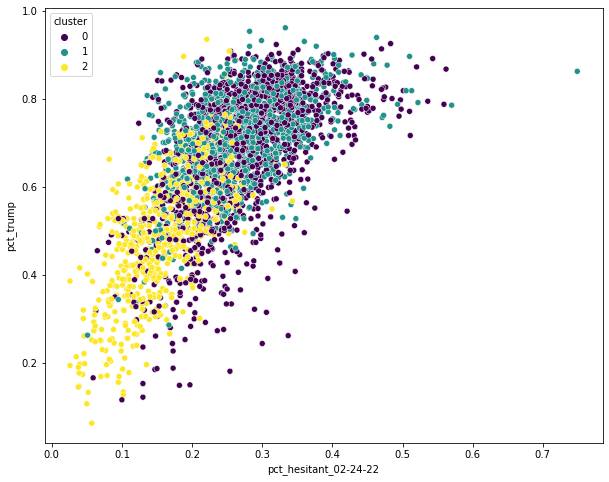

In [43]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df['pct_hesitant_02-24-22'],y=df['pct_trump'], hue = df['cluster'], palette='viridis');

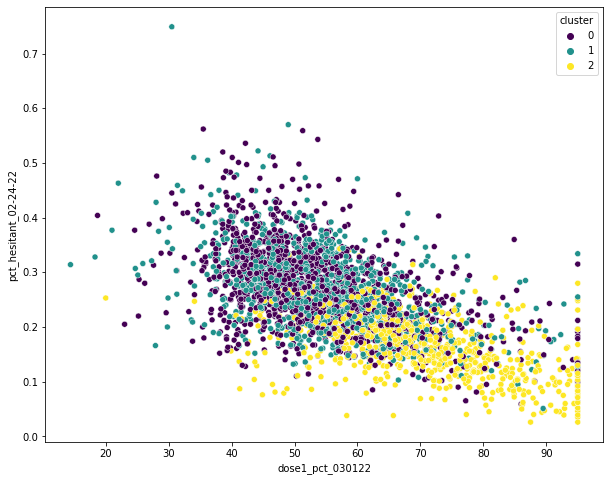

In [44]:
plt.figure(figsize=(10, 8))
sns.scatterplot(y=df['pct_hesitant_02-24-22'],x=df['dose1_pct_030122'], hue = df['cluster'], palette='viridis');

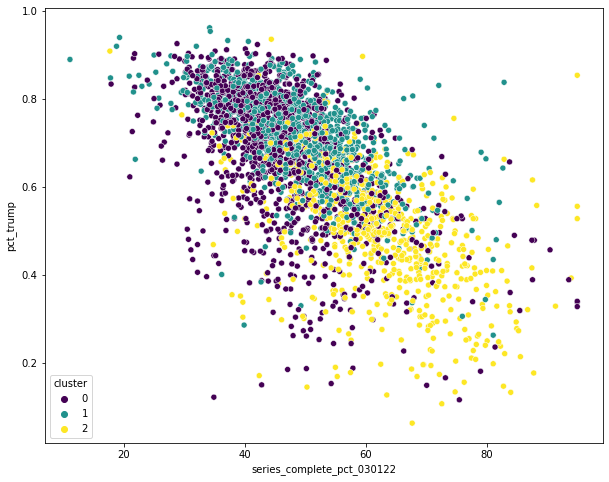

In [45]:
plt.figure(figsize=(10, 8))
sns.scatterplot(y=df['pct_trump'],x=df['series_complete_pct_030122'], hue = df['cluster'], palette='viridis');

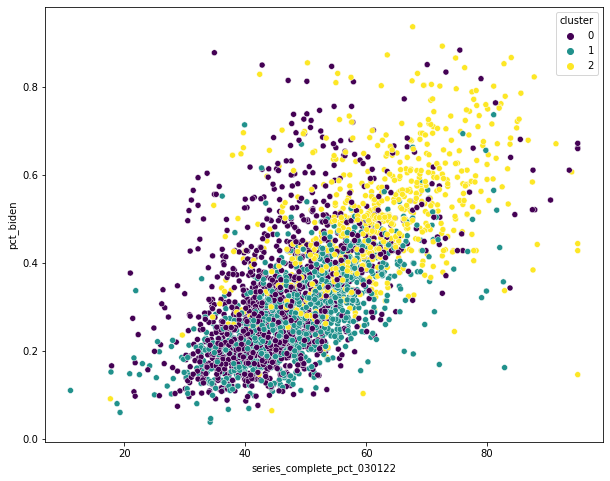

In [46]:
plt.figure(figsize=(10, 8))
sns.scatterplot(y=df['pct_biden'],x=df['series_complete_pct_030122'], hue = df['cluster'], palette='viridis');

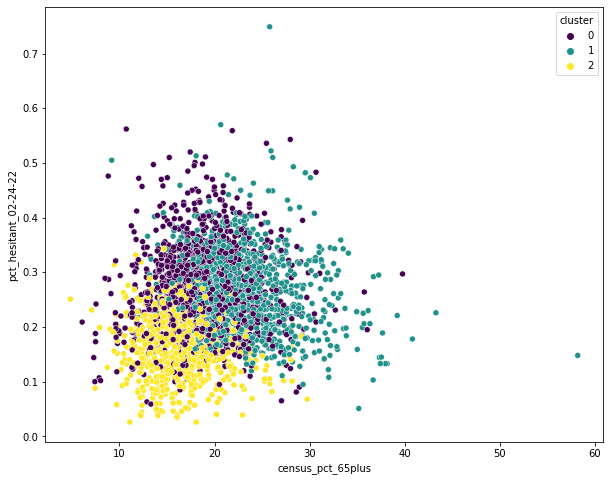

In [53]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df['census_pct_65plus'],y=df['pct_hesitant_02-24-22'], hue = df['cluster'], palette='viridis');

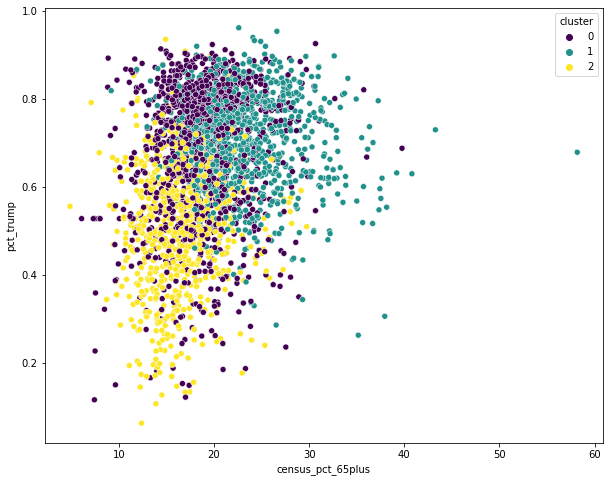

In [54]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df['census_pct_65plus'],y=df['pct_trump'], hue = df['cluster'], palette='viridis');

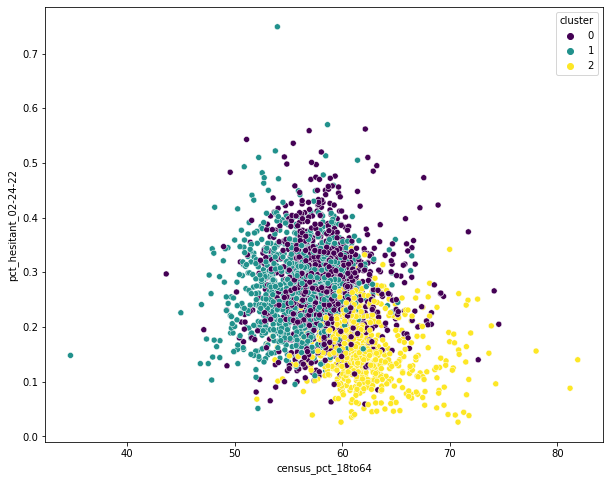

In [55]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df['census_pct_18to64'],y=df['pct_hesitant_02-24-22'], hue = df['cluster'], palette='viridis');

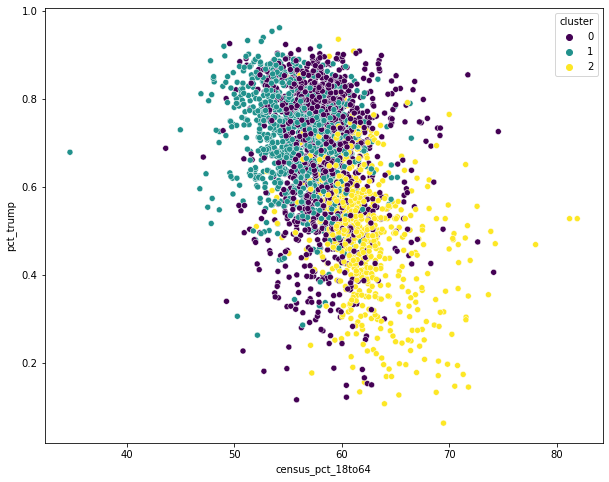

In [56]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df['census_pct_18to64'],y=df['pct_trump'], hue = df['cluster'], palette='viridis');

In [ ]:
plt.rcParams['figure.figsize'] = (14, 9)

## Model - 2 - 030121

In [43]:
df.columns

Index(['county', 'state', 'fips', 'svi_ctgy', 'metro_status', 'census2019',
       'census_pct_65plus', 'census_pct_18to64', 'dose1_pct_030121',
       'series_complete_pct_030121', 'dose1_pct_090121',
       'series_complete_pct_090121', 'dose1_pct_030122',
       'series_complete_pct_030122', 'booster_doses_pct_030122', 'null_pct',
       'uninsured_pct', 'socio_wgt', 'hh_wgt', 'minority_wgt', 'housing_wgt',
       'overall_wgt', 'pct_hesitant_02-24-22',
       'pct_somewhat_hesitant_02-24-22', 'pct_highly_hesitant_02-24-22',
       'candidate_won', 'winner_votes', 'total_votes', 'pct_trump',
       'pct_biden', 'cluster'],
      dtype='object')

In [47]:
X = df.drop(columns=['county','state','fips','dose1_pct_090121','series_complete_pct_090121','dose1_pct_030122','series_complete_pct_030122',
                 'booster_doses_pct_030122','null_pct','candidate_won','winner_votes','total_votes','pct_trump','pct_biden','cluster'])
X.head()

svi_ctgy  metro_status  census2019  census_pct_65plus  \
county_state                                                              
mason_mi               2.0           0.0     29144.0          24.255421   
colusa_ca              3.0           0.0     21547.0          14.916230   
henry_al               3.0           1.0     17205.0          23.429236   
pulaski_ky             3.0           0.0     64979.0          18.975361   
franklin city_va       3.0           0.0      7967.0          19.066148   

                  census_pct_18to64  dose1_pct_030121  \
county_state                                            
mason_mi                  55.486550              19.9   
colusa_ca                 57.975588              12.4   
henry_al                  56.181343              13.8   
pulaski_ky                58.734360              12.7   
franklin city_va          54.951676               0.0   

                  series_complete_pct_030121  uninsured_pct  socio_wgt  \
county_state                                                             
mason_mi                                12.1       0.067373   0.519038   
colusa_ca                                3.8       0.102637   0.654030   
henry_al                                 6.1       0.111948   0.687634   
pulaski_ky                               6.1       0.058103   0.785212   
franklin city_va                         0.0       0.090123   0.720020   

                    hh_wgt  minority_wgt  housing_wgt  overall_wgt  \
county_state                                                         
mason_mi          0.721260      0.163782     0.514260     0.489260   
colusa_ca         0.687567      0.875846     0.738581     0.809511   
henry_al          0.754715      0.288568     0.423016     0.583247   
pulaski_ky        0.806002      0.118135     0.547083     0.638048   
franklin city_va  0.858973      0.425004     0.366614     0.626408   

                  pct_hesitant_02-24-22  pct_somewhat_hesitant_02-24-22  \
county_state                                                              
mason_mi                          0.187                           0.046   
colusa_ca                         0.293                           0.081   
henry_al                          0.339                           0.075   
pulaski_ky                        0.297                           0.064   
franklin city_va                  0.180                           0.059   

                  pct_highly_hesitant_02-24-22  
county_state                                    
mason_mi                                 0.141  
colusa_ca                                0.212  
henry_al                                 0.264  
pulaski_ky                               0.233  
franklin city_va                         0.121

In [48]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [50]:
inertia_list = []

for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)
    
inertia_list

[39796.2955808195,
 34562.45581457824,
 32215.20554462041,
 30527.37587784407,
 28966.739403620642,
 27633.277971564534,
 26515.210717357575,
 25570.42441200075,
 24724.72254513574,
 23864.54744094184,
 23152.58557550878,
 22592.012908212248,
 22092.798094075697]

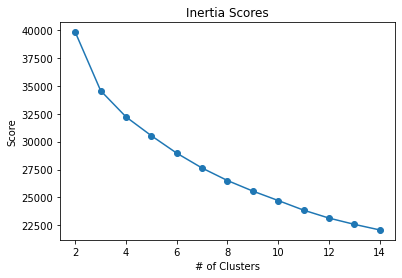

In [52]:
plt.plot(range(2, 15), inertia_list, marker='o')
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Inertia Scores');

In [53]:
silhouette_list = []

for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_list.append(silhouette_score(X_scaled, kmeans.labels_))
silhouette_list

[0.19670665097769557,
 0.17771554294749015,
 0.14090019244540908,
 0.14131389939065467,
 0.13857896049459703,
 0.1379079579023244,
 0.1297074075515144,
 0.1216017718704487,
 0.1259641149499082,
 0.1252227044741644,
 0.12315200543036689,
 0.11836932497854867,
 0.12148484276422179]

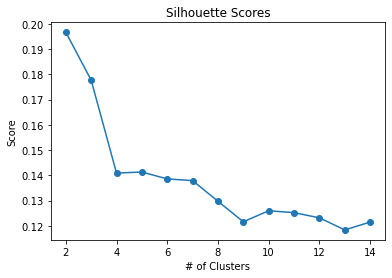

In [54]:
plt.plot(range(2, 15), silhouette_list, marker='o')
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Silhouette Scores');

In [66]:
km = KMeans(n_clusters =3, random_state=42)
km.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [67]:
df['cluster'] = km.labels_
df.head()

county state     fips  svi_ctgy  metro_status  \
county_state                                                              
mason_mi            Mason County    MI  26105.0       2.0           0.0   
colusa_ca          Colusa County    CA   6011.0       3.0           0.0   
henry_al            Henry County    AL   1067.0       3.0           1.0   
pulaski_ky        Pulaski County    KY  21199.0       3.0           0.0   
franklin city_va   Franklin city    VA  51620.0       3.0           0.0   

                  census2019  census_pct_65plus  census_pct_18to64  \
county_state                                                         
mason_mi             29144.0          24.255421          55.486550   
colusa_ca            21547.0          14.916230          57.975588   
henry_al             17205.0          23.429236          56.181343   
pulaski_ky           64979.0          18.975361          58.734360   
franklin city_va      7967.0          19.066148          54.951676   

                  dose1_pct_030121  series_complete_pct_030121  ...  \
county_state                                                    ...   
mason_mi                      19.9                        12.1  ...   
colusa_ca                     12.4                         3.8  ...   
henry_al                      13.8                         6.1  ...   
pulaski_ky                    12.7                         6.1  ...   
franklin city_va               0.0                         0.0  ...   

                  overall_wgt  pct_hesitant_02-24-22  \
county_state                                           
mason_mi             0.489260                  0.187   
colusa_ca            0.809511                  0.293   
henry_al             0.583247                  0.339   
pulaski_ky           0.638048                  0.297   
franklin city_va     0.626408                  0.180   

                  pct_somewhat_hesitant_02-24-22  \
county_state                                       
mason_mi                                   0.046   
colusa_ca                                  0.081   
henry_al                                   0.075   
pulaski_ky                                 0.064   
franklin city_va                           0.059   

                  pct_highly_hesitant_02-24-22  candidate_won  winner_votes  \
county_state                                                                  
mason_mi                                 0.141            1.0       10207.0   
colusa_ca                                0.212            1.0        4554.0   
henry_al                                 0.264            1.0        6607.0   
pulaski_ky                               0.233            1.0       25442.0   
franklin city_va                         0.121            0.0        2525.0   

                  total_votes  pct_trump  pct_biden  cluster  
county_state                                                  
mason_mi              17254.0      0.592      0.408        2  
colusa_ca              7951.0      0.573      0.427        0  
henry_al               9298.0      0.711      0.289        0  
pulaski_ky            31557.0      0.806      0.194        0  
franklin city_va       4058.0      0.378      0.622        0  

[5 rows x 31 columns]

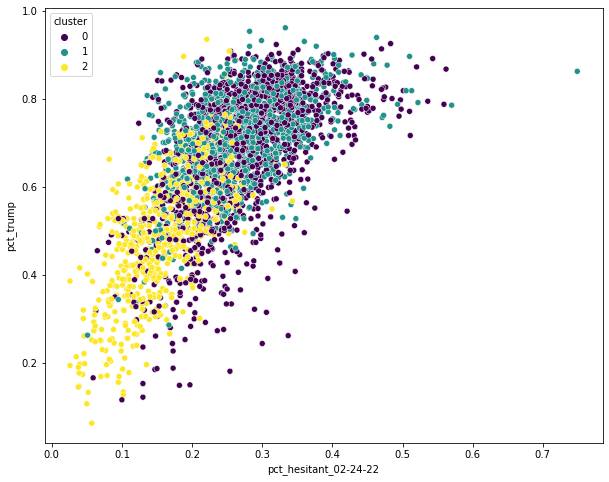

In [64]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df['pct_hesitant_02-24-22'],y=df['pct_trump'], hue = df['cluster'], palette='viridis');

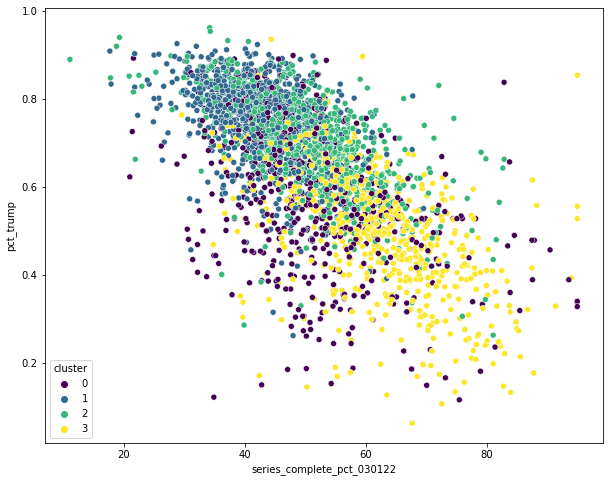

In [78]:
plt.figure(figsize=(10, 8))
sns.scatterplot(y=df['pct_trump'],x=df['series_complete_pct_030122'], hue = df['cluster'], palette='viridis');

### Model

In [73]:
km = KMeans(n_clusters = 4, random_state=42)
km.fit(X_scaled)

KMeans(n_clusters=4, random_state=42)

In [74]:
km.predict(X_scaled)

array([2, 0, 1, ..., 2, 3, 1], dtype=int32)

In [75]:
df['cluster'] = km.labels_
df.head()

county state     fips  svi_ctgy  metro_status  \
county_state                                                          
mason_mi        Mason County    MI  26105.0       2.0           0.0   
colusa_ca      Colusa County    CA   6011.0       3.0           0.0   
henry_al        Henry County    AL   1067.0       3.0           1.0   
pulaski_ky    Pulaski County    KY  21199.0       3.0           0.0   
aiken_sc        Aiken County    SC  45003.0       3.0           1.0   

              census2019  census_pct_65plus  census_pct_18to64  \
county_state                                                     
mason_mi         29144.0          24.255421          55.486550   
colusa_ca        21547.0          14.916230          57.975588   
henry_al         17205.0          23.429236          56.181343   
pulaski_ky       64979.0          18.975361          58.734360   
aiken_sc        170872.0          19.893253          58.722904   

              dose1_pct_030121  series_complete_pct_030121  ...  overall_wgt  \
county_state                                                ...                
mason_mi                  19.9                        12.1  ...     0.489260   
colusa_ca                 12.4                         3.8  ...     0.809511   
henry_al                  13.8                         6.1  ...     0.583247   
pulaski_ky                12.7                         6.1  ...     0.638048   
aiken_sc                  12.9                         6.1  ...     0.562289   

              pct_hesitant_02-24-22  pct_somewhat_hesitant_02-24-22  \
county_state                                                          
mason_mi                      0.187                           0.046   
colusa_ca                     0.293                           0.081   
henry_al                      0.339                           0.075   
pulaski_ky                    0.297                           0.064   
aiken_sc                      0.219                           0.054   

              pct_highly_hesitant_02-24-22  candidate_won  winner_votes  \
county_state                                                              
mason_mi                             0.141            1.0       10207.0   
colusa_ca                            0.212            1.0        4554.0   
henry_al                             0.264            1.0        6607.0   
pulaski_ky                           0.233            1.0       25442.0   
aiken_sc                             0.166            1.0       51589.0   

              total_votes  pct_trump  pct_biden  cluster  
county_state                                              
mason_mi          17254.0      0.592      0.408        2  
colusa_ca          7951.0      0.573      0.427        0  
henry_al           9298.0      0.711      0.289        1  
pulaski_ky        31557.0      0.806      0.194        1  
aiken_sc          85185.0      0.606      0.394        0  

[5 rows x 31 columns]

In [76]:
df['cluster'].value_counts()

2    940
1    867
3    673
0    575
Name: cluster, dtype: int64

<Figure size 720x576 with 0 Axes>

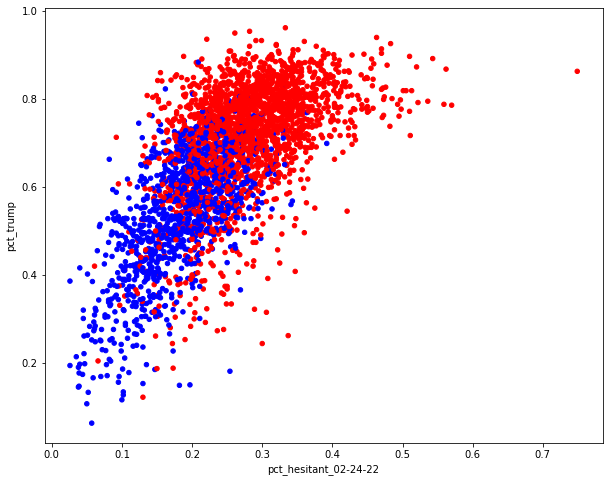

In [68]:
# # Create Scatterplot!

# # Figsize
# plt.figure(figsize=(10,8))

# # Map colors for different clusters
# colors = ["red", "blue", 'green']
# df['color'] = df['cluster'].map(lambda p: colors[p])

# # Plot points
# ax = df.plot(    
#     kind="scatter", 
#     x='pct_hesitant_02-24-22', y="pct_trump",
#     figsize=(10,8),
#     c = df['color']
# );

# # Plot Centroids
# # centroids.plot(
# #     kind="scatter", 
# #     x="duration", y="waiting", 
#     marker="*", c=["r", "b", "g"], s=550, ax=ax
# );

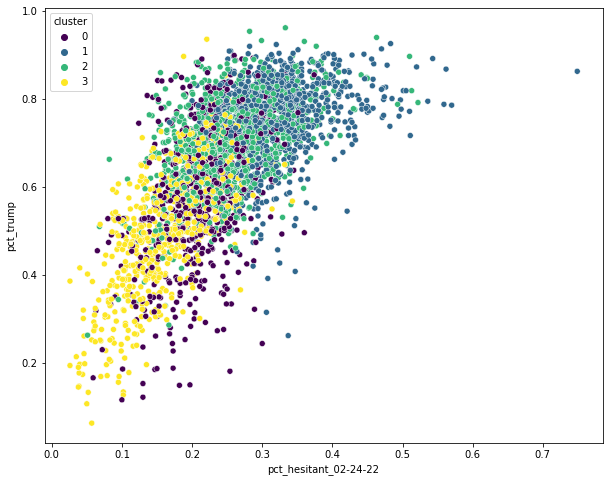

In [77]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df['pct_hesitant_02-24-22'],y=df['pct_trump'], hue = df['cluster'], palette='viridis');

## DBSCAN

In [80]:
X.describe().T

count           mean            std  \
fips                            3140.0   30397.503185   15156.538249   
svi_ctgy                        3140.0       2.500000       1.118497   
metro_status                    3140.0       0.371019       0.483155   
census2019                      3140.0  104531.921975  333553.381102   
census_pct_65plus               3140.0      19.750861       4.787916   
census_pct_18to64               3140.0      58.315585       3.904695   
dose1_pct_030121                3140.0      12.268280       7.371456   
series_complete_pct_030121      3140.0       6.272293       4.303340   
booster_doses_pct_030121        3140.0       0.000000       0.000000   
dose1_pct_090121                3140.0      38.425223      20.332737   
series_complete_pct_090121      3140.0      35.007389      16.681599   
booster_doses_pct_090121        3140.0       0.000000       0.000000   
dose1_pct_030122                3140.0      56.452580      16.502010   
series_complete_pct_030122      3140.0      50.127229      12.713410   
booster_doses_pct_030122        3140.0      41.857197      10.862338   
null_pct                        3140.0       0.007143       0.038277   
uninsured_pct                   3140.0       0.098184       0.049886   
socio_wgt                       3140.0       0.548675       0.185970   
hh_wgt                          3140.0       0.632568       0.171000   
minority_wgt                    3140.0       0.334407       0.208596   
housing_wgt                     3140.0       0.566156       0.145559   
overall_wgt                     3140.0       0.540955       0.172813   
pct_hesitant_02-24-22           3140.0       0.245090       0.082907   
pct_somewhat_hesitant_02-24-22  3140.0       0.069968       0.028090   
pct_highly_hesitant_02-24-22    3140.0       0.175125       0.067342   
winner_votes                    3140.0   32311.076115   97660.865588   
total_votes                     3140.0   51835.219745  151236.446265   
pct_trump                       3140.0       0.651990       0.155913   
pct_biden                       3140.0       0.347451       0.155375   

                                        min           25%           50%  \
fips                            1001.000000  18180.500000  29178.000000   
svi_ctgy                           1.000000      1.000000      3.000000   
metro_status                       0.000000      0.000000      0.000000   
census2019                       169.000000  10913.750000  25763.500000   
census_pct_65plus                  4.859265     16.684684     19.401980   
census_pct_18to64                 34.731158     55.980938     58.266079   
dose1_pct_030121                   0.000000      8.400000     13.000000   
series_complete_pct_030121         0.000000      3.900000      6.200000   
booster_doses_pct_030121           0.000000      0.000000      0.000000   
dose1_pct_090121                   0.000000     30.300000     42.300000   
series_complete_pct_090121         0.000000     28.000000     36.750000   
booster_doses_pct_090121           0.000000      0.000000      0.000000   
dose1_pct_030122                   0.000000     47.400000     56.000000   
series_complete_pct_030122         0.000000     41.900000     49.200000   
booster_doses_pct_030122           0.000000     35.800000     42.100000   
null_pct                           0.000000      0.000000      0.000000   
uninsured_pct                      0.012000      0.060785      0.089496   
socio_wgt                          0.041000      0.406476      0.550809   
hh_wgt                             0.035500      0.526076      0.654134   
minority_wgt                       0.001100      0.162161      0.299597   
housing_wgt                        0.042500      0.474923      0.563762   
overall_wgt                        0.030889      0.419204      0.535911   
pct_hesitant_02-24-22              0.026000      0.188750      0.243000   
pct_somewhat_hesitant_02-24-22     0.007000      0.051000      0.066000 

In [83]:
cols = [column for column in X.columns if '030121' not in column]

In [85]:
cols = [column for column in cols if '090121' not in column]

In [66]:
X

svi_ctgy  metro_status  census_pct_65plus  \
county_state                                                    
mason_mi                 2.0           0.0          24.255421   
colusa_ca                3.0           0.0          14.916230   
henry_al                 3.0           1.0          23.429236   
pulaski_ky               3.0           0.0          18.975361   
aiken_sc                 3.0           1.0          19.893253   
...                      ...           ...                ...   
henderson_tx             3.0           0.0          22.401102   
pike_il                  2.0           0.0          21.283979   
warren_il                3.0           0.0          20.173355   
cass_mo                  1.0           1.0          17.332199   
richland parish_la       4.0           0.0          18.109532   

                    census_pct_18to64  series_complete_pct_030122  \
county_state                                                        
mason_mi                    55.486550                        60.1   
colusa_ca                   57.975588                        59.7   
henry_al                    56.181343                        44.9   
pulaski_ky                  58.734360                        45.6   
aiken_sc                    58.722904                        45.2   
...                               ...                         ...   
henderson_tx                56.324256                        38.9   
pike_il                     56.185335                        40.4   
warren_il                   58.311565                        49.1   
cass_mo                     58.842881                        51.1   
richland parish_la          58.716827                        42.5   

                    booster_doses_pct_030122  uninsured_pct  socio_wgt  \
county_state                                                             
mason_mi                                58.2       0.067373   0.519038   
colusa_ca                               33.6       0.102637   0.654030   
henry_al                                33.8       0.111948   0.687634   
pulaski_ky                              40.9       0.058103   0.785212   
aiken_sc                                36.2       0.111582   0.590912   
...                                      ...            ...        ...   
henderson_tx                            38.9       0.185260   0.623136   
pike_il                                 43.1       0.048369   0.590135   
warren_il                               51.8       0.033280   0.567395   
cass_mo                                 41.3       0.073385   0.365968   
richland parish_la                      37.6       0.148530   0.755460   

                      hh_wgt  minority_wgt  housing_wgt  overall_wgt  \
county_state                                                           
mason_mi            0.721260      0.163782     0.514260     0.489260   
colusa_ca           0.687567      0.875846     0.738581     0.809511   
henry_al            0.754715      0.288568     0.423016     0.583247   
pulaski_ky          0.806002      0.118135     0.547083     0.638048   
aiken_sc            0.602271      0.449063     0.508265     0.562289   
...                      ...           ...          ...          ...   
henderson_tx        0.730684      0.410492     0.548642     0.615094   
pike_il             0.802811      0.088214     0.494221     0.507304   
warren_il           0.624949      0.355752     0.626059     0.564471   
cass_mo             0.586386      0.198768     0.367826     0.336597   
richland parish_la  0.688141      0.320876     0.707706     0.705161   

                    pct_hesitant_02-24-22  pct_somewhat_hesitant_02-24-22  \
county_state                                                                
mason_mi                            0.187                           0.046   
colusa_ca                           0.293                           0.081   
henry_al                            0.339                           

In [67]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [68]:
dbscan = DBSCAN(eps=0.5)
dbscan.fit(X_scaled)

DBSCAN()

In [70]:
dbscan.labels_

array([-1, -1, -1, ..., -1, -1, -1])

In [96]:
df['cluster'] = km.labels_
df.head()

county state     fips  svi_ctgy  metro_status  \
county_state                                                              
mason_mi            Mason County    MI  26105.0       2.0           0.0   
colusa_ca          Colusa County    CA   6011.0       3.0           0.0   
henry_al            Henry County    AL   1067.0       3.0           1.0   
pulaski_ky        Pulaski County    KY  21199.0       3.0           0.0   
franklin city_va   Franklin city    VA  51620.0       3.0           0.0   

                  census2019  census_pct_65plus  census_pct_18to64  \
county_state                                                         
mason_mi             29144.0          24.255421          55.486550   
colusa_ca            21547.0          14.916230          57.975588   
henry_al             17205.0          23.429236          56.181343   
pulaski_ky           64979.0          18.975361          58.734360   
franklin city_va      7967.0          19.066148          54.951676   

                  dose1_pct_030121  series_complete_pct_030121  ...  \
county_state                                                    ...   
mason_mi                      19.9                        12.1  ...   
colusa_ca                     12.4                         3.8  ...   
henry_al                      13.8                         6.1  ...   
pulaski_ky                    12.7                         6.1  ...   
franklin city_va               0.0                         0.0  ...   

                  pct_hesitant_02-24-22  pct_somewhat_hesitant_02-24-22  \
county_state                                                              
mason_mi                          0.187                           0.046   
colusa_ca                         0.293                           0.081   
henry_al                          0.339                           0.075   
pulaski_ky                        0.297                           0.064   
franklin city_va                  0.180                           0.059   

                  pct_highly_hesitant_02-24-22  candidate_won  winner_votes  \
county_state                                                                  
mason_mi                                 0.141            1.0       10207.0   
colusa_ca                                0.212            1.0        4554.0   
henry_al                                 0.264            1.0        6607.0   
pulaski_ky                               0.233            1.0       25442.0   
franklin city_va                         0.121            0.0        2525.0   

                  total_votes  pct_trump  pct_biden  cluster  color  
county_state                                                         
mason_mi              17254.0      0.592      0.408        2   blue  
colusa_ca              7951.0      0.573      0.427        1    red  
henry_al               9298.0      0.711      0.289        1    red  
pulaski_ky            31557.0      0.806      0.194        1    red  
franklin city_va       4058.0      0.378      0.622        1    red  

[5 rows x 34 columns]

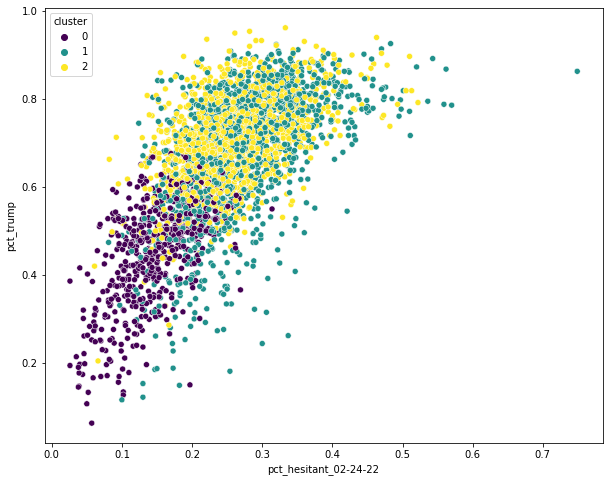

In [97]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df['pct_hesitant_02-24-22'],y=df['pct_trump'], hue = df['cluster'], palette='viridis');

In [98]:
inertia_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)
    
inertia_list

[58938.69821649623,
 51687.977044551735,
 47615.63154017643,
 44010.44065277021,
 42019.84116934104,
 40359.46206201989,
 38573.960506224066,
 37673.78338118712,
 35803.42506684119]

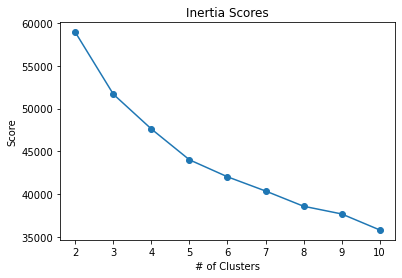

In [99]:
plt.plot(range(2, 11), inertia_list, marker='o')
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Inertia Scores');

In [100]:
silhouette_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_list.append(silhouette_score(X_scaled, kmeans.labels_))
silhouette_list

[0.21947707662757068,
 0.15780154015022627,
 0.15832934213931268,
 0.14655482238982961,
 0.13657626038447543,
 0.1325496143834751,
 0.1326984301877281,
 0.11004238511293786,
 0.11160745406136104]

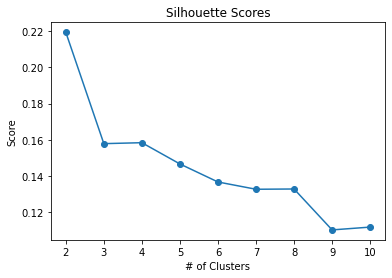

In [101]:
plt.plot(range(2, 11), silhouette_list, marker='o')
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Silhouette Scores');

In [91]:
dbscan = DBSCAN(eps=0.5)
dbscan.fit(X_scaled)

DBSCAN()

In [92]:
pd.Series(dbscan.labels_).unique()

array([-1])